In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

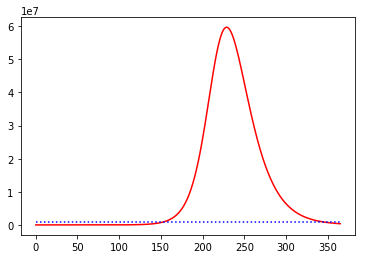

In [55]:
alpha = 0.15
beta = 1./14. #reciprocal of infectious period
t = np.linspace(0,365,1001) #one year time period 
pop = 3.5e8 #population size
med_capacity = 1.e6
def SIRmodel(y,t):
    S, I, R = y
    return ([-alpha*S*I,alpha*S*I-beta*I,beta*I])

def get_trajectory():
    initinfected = 5
    Iinit = initinfected/pop
    Sinit = (pop - initinfected)/pop 
    Rinit = 0
    sol = odeint(SIRmodel,[Sinit,Iinit,Rinit],t)
    return(sol)

soln = get_trajectory()
plt.plot(t,pop*soln[:,1],'r-',[0,365],[med_capacity,med_capacity],'b:');
#print(pop*soln[:,1])

data = np.zeros((1001,4))
data[:,0] = t
data[:,1:4] = pop*soln
np.savetxt('data.csv',data,delimiter=",")



In [56]:
t = np.linspace(0,365,1001)
I = pop*soln[:,1]
h = t[1]-t[0] #mesh spacing in time

#area above medical capacity line and below curve
Iadj = I
for i in range(0,len(I)):
    Iadj[i] = max(I[i]-med_capacity,0)
w = np.ones(1001)
w[1:-1] = 2
area = (h/2.)*np.dot(w,Iadj)
print("We are {} people*days above capacity".format(area))



We are 3805095036.363493 people*days above capacity
